## Training ANN on the Iris Dataset

In [1]:
''' This is a tensor flow tutorial in the iris dataset to classify iris species. You can play with adding layers
    to the structure to see if it improves training or test data.'''
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### View the data

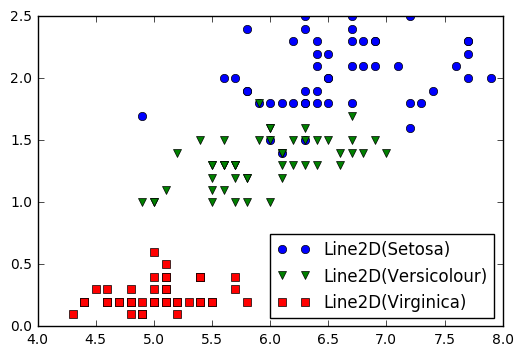

In [2]:
def plot_iris(X,Y, final):
    X = X[['Sepal_Length', 'Petal_Width']]
    df = pd.concat([X,Y],axis=1)
    if(final):
      x1 = df['Sepal_Length'][df['Class']==0]
      y1 = df['Petal_Width'][df['Class']==0]
      x2 = df['Sepal_Length'][df['Class']==1]
      y2 = df['Petal_Width'][df['Class']==1]
      x3 = df['Sepal_Length'][df['Class']==2]
      y3 = df['Petal_Width'][df['Class']==2]
    else:
      x1 = df['Sepal_Length'][df['Setosa']==1]
      y1 = df['Petal_Width'][df['Setosa']==1]
      x2 = df['Sepal_Length'][df['Versicolour']==1]
      y2 = df['Petal_Width'][df['Versicolour']==1]
      x3 = df['Sepal_Length'][df['Virginica']==1]
      y3 = df['Petal_Width'][df['Virginica']==1]
    Setosa,= plt.plot(x1, y1, 'bo', label = 'Setosa')
    Versicolour,= plt.plot(x2, y2, 'gv', label = 'Versicolour')
    Virginica,= plt.plot(x3, y3, 'rs', label ='Virginica')
    plt.legend([Setosa, Versicolour, Virginica], loc='lower right')
    plt.show()
## read in Iris dataset 
X = pd.read_csv('irisX.csv')
Y = pd.read_csv('irisY.csv')
plot_iris(X,Y, False)

### A function to check classification accuracy 

In [3]:
def check_accuracy(predictions, labels):
      pred_class = np.argmax(predictions, 1)
      true_class = np.argmax(labels, 1)
      return (100.0 * np.sum(pred_class == true_class) / predictions.shape[0])

### Training & Testing Datasets  

In [4]:
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)
n_features = 4
n_classes = 3
train_size = 120
test_size = 30

## sample data
size = len(X)
rows = np.array(list(range(size)))
train_rows = np.random.choice(size, size = train_size, replace=False)
test_rows = np.array(list(set(rows) - set(train_rows)))
xtrain = X[train_rows,:]
ytrain = Y[train_rows]
xtest = X[test_rows,:]
ytest = Y[test_rows]

### ANN Structure Set-Up

In [5]:
## placeholders
x_ = tf.placeholder(tf.float32, [train_size, n_features])
y_ = tf.placeholder(tf.float32, [train_size, n_classes])

## ANN structure
W1 = tf.Variable(tf.random_uniform([n_features, 8], minval=-.1, maxval=.1, dtype=np.float32))
b1 = tf.Variable(tf.zeros([1, 8], dtype=np.float32))

W2 = tf.Variable(tf.random_uniform([8, n_classes], minval=-.1, maxval=.1, dtype=np.float32))
b2 = tf.Variable(tf.zeros([n_classes], dtype=np.float32))

y = tf.nn.softmax(tf.matmul(
      tf.nn.relu(tf.matmul(xtrain, W1) + b1), 
  W2) + b2)

yt = tf.nn.softmax(tf.matmul(
      tf.nn.relu(tf.matmul(xtest, W1) + b1), 
  W2) + b2)

## define loss and optimizer
cross_entropy = -tf.reduce_sum(y_*tf.log(y + 1e-10))
eta = .0001
train = tf.train.GradientDescentOptimizer(eta).minimize(cross_entropy)

### Initialize & Launch Graph

In [6]:
## start session
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init)

## Train

In [7]:
## train
for i in range(20000):
  result = sess.run([cross_entropy, train], feed_dict = {x_: xtrain, y_:ytrain})
  if i % 5000 == 0 :
      CE = result[0]
      print('Step: ' + str(i))
      print('cross entropy: ' + str(CE))

Step: 0
cross entropy: 133.887
Step: 5000
cross entropy: 9.74481
Step: 10000
cross entropy: 8.37972
Step: 15000
cross entropy: 7.78447


### Evaluate

Train Accuracy: 97.5
Test Accuracy: 100.0


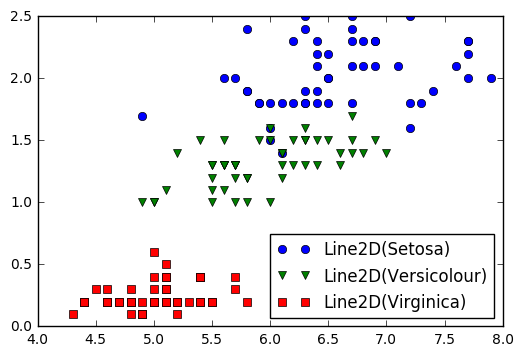

In [9]:
## evaluate
train_acc = check_accuracy(y.eval(), ytrain)
test_acc = check_accuracy(yt.eval(), ytest)
print("Train Accuracy: " + str(train_acc))
print("Test Accuracy: " + str(test_acc))
Y_preds = pd.DataFrame(np.argmax(y.eval(),1).tolist() + np.argmax(yt.eval(),1).tolist())
Y_preds.columns= ['Class']
X_concat = pd.DataFrame(np.concatenate((xtrain, xtest)))
X_concat.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
plot_iris(X_concat, Y_preds, True)